# **Análisis de Sistemas Térmicos usando Python**

In [1]:
#pip install Coolprop

In [1]:
import numpy as np
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt

#import the things you need
from CoolProp.HumidAirProp import HAPropsSI

#Enthalpy (J per kg dry air) as a function of temperature, pressure,
#    and relative humidity at dry bulb temperature T of 25C, pressure
#    P of one atmosphere, relative humidity R of 50%
h = HAPropsSI('H','T',298.15,'P',101325,'R',0.5); print(h)
50423.45039107799

#Temperature of saturated air at the previous enthalpy
T = HAPropsSI('T','P',101325,'H',h,'R',1.0); print(T)
290.9620924692057

#Temperature of saturated air - order of inputs doesn't matter
T = HAPropsSI('T','H',h,'R',1.0,'P',101325); print(T)
290.9620924692057

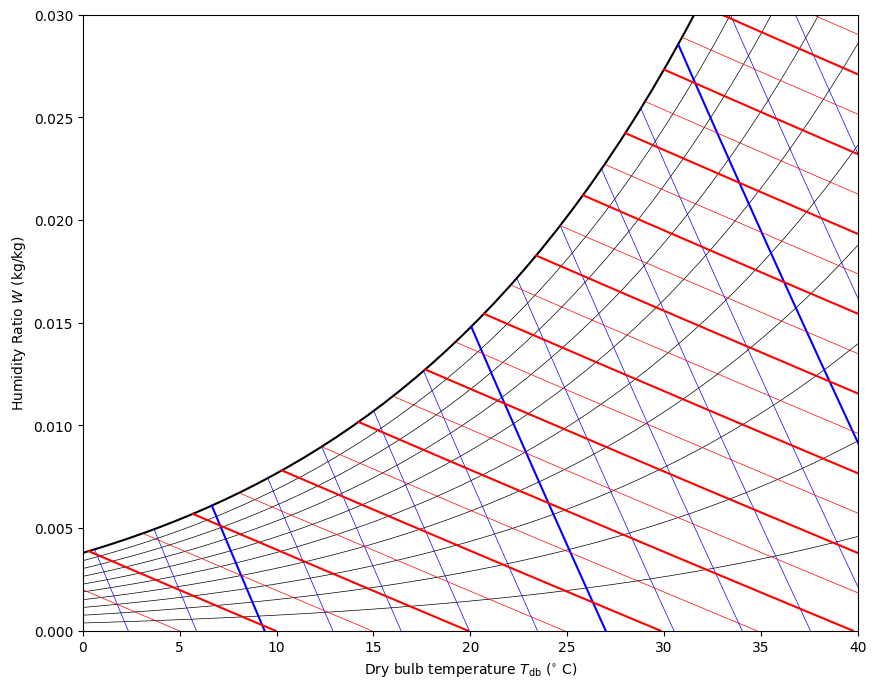

In [17]:
Pressure = 101325# Pa 

fig, ax = plt.subplots(1,1,figsize=(10, 8))
Tdbvec = np.linspace(0, 40)+273.15

# Lines of constant relative humidity
for RH in np.arange(0.1, 1, 0.1):
    W = CP.HAPropsSI("W","R",RH,"P",Pressure,"T",Tdbvec)
    plt.plot(Tdbvec-273.15, W, color='k', lw = 0.5)

# Saturation curve
W = CP.HAPropsSI("W","R",1,"P",Pressure,"T",Tdbvec)
plt.plot(Tdbvec-273.15, W, color='k', lw=1.5)

# Lines of constant Vda
for Vda in np.arange(0.69, 0.961, 0.01):
    R = np.linspace(0,1)
    W = CP.HAPropsSI("W","R",R,"P",Pressure,"Vda",Vda)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",Pressure,"Vda",Vda)
    plt.plot(Tdb-273.15, W, color='b', lw=1.5 if abs(Vda % 0.05) < 0.001 else 0.5)

# Lines of constant Enthalpy
for h in np.arange(0, 120, 5):
    R = np.linspace(0.0, 1)
    #print(h)
    Tdb = CP.HAPropsSI("Tdb","R",R,"P",Pressure,"H",h*1000)
    W = CP.HAPropsSI("W","R",R,"P",Pressure,"Tdb",Tdb)
    plt.plot(Tdb-273.15, W, color='r', lw=1.5 if abs(h % 10) < 0.001 else 0.5)

plt.xlabel(r'Dry bulb temperature $T_{\rm db}$ ($^{\circ}$ C)')
plt.ylabel(r'Humidity Ratio $W$ (kg/kg)')
plt.ylim(0, 0.030)
plt.xlim(0, 40)
plt.show()